# Modeling - ethereum - v1

# Setup

## Library import
We import all the required Python libraries

In [45]:
import os

# Data manipulation
from feature_engine.encoding import RareLabelEncoder, CountFrequencyEncoder
import pandas as pd
import numpy as np

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

import lightgbm as lgb
import missingno as msno
from pycaret.classification import ClassificationExperiment
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import set_config

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Options for pandas
set_config(transform_output = "pandas")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.5f}'.format)
# pd.options.display.float_format = '{:.5f}'.format
# pd.options.display.max_rows = 120

## Local library import
We import all the required local libraries libraries

In [2]:
os.chdir('../')
from src.utils.data_describe import breve_descricao, serie_nulos, cardinalidade, check_for_equal_columns
os.chdir('./notebooks/')

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [3]:
RAW_FOLDER = '../data/raw/'
INTERIM_FOLDER = '../data/interim/'
PROCESSED_FOLDER = '../data/processed/'
REPORTS_FOLDER = '../reports/'
RANDOM_STATE = 42

train_size = 0.15

# Experience 01 - Only numerical attributes

## Data import

In [4]:
df_train_exp_01 = pd.read_parquet(INTERIM_FOLDER + 'df_train_exp_01.pqt')
df_test_exp_01 = pd.read_parquet(INTERIM_FOLDER + 'df_test_exp_01.pqt')

display(df_train_exp_01.head(3))

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_(including_tnx_to_create_contract),total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
0,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31000,34.12000,4815.43000,3,13,0,10,3,1.00000,2.50105,1.34844,1.00087,11.27787,5.84292,16,17.52875,17.52978,0.00104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,1,3976.50000,834.77000,9622.53000,2,2,0,1,2,0.58627,0.94751,0.76689,0.58541,0.94728,0.76635,4,1.53269,1.53378,0.00109,1.00000,1.33700,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.33700,1.33700,1.33700,0.00000,0.00000,0.00000,0.00000,1.00000
2,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,1,112.90000,31.87000,321.42000,2,3,0,3,1,0.00102,0.81780,0.43961,0.50039,0.81751,0.65895,5,1.31790,1.31882,0.00092,1.00000,1.33700,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.33700,1.33700,1.33700,0.00000,0.00000,0.00000,0.00000,1.00000


## Testing with pycaret

In [5]:
exp = ClassificationExperiment()
exp.setup(
    df_train_exp_01.drop(columns=['Address']),
    target='FLAG', train_size=train_size, session_id=RANDOM_STATE
);

,Description,Value
0,Session id,42
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(3976, 35)"
4,Transformed data shape,"(3976, 35)"
5,Transformed train set shape,"(596, 35)"
6,Transformed test set shape,"(3380, 35)"
7,Numeric features,34
8,Rows with missing values,17.9%
9,Preprocess,True


In [6]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9664,0.9945,0.9676,0.9630,0.9645,0.9327,0.9340,1.5860
ada,Ada Boost Classifier,0.9615,0.9861,0.9606,0.9589,0.9592,0.9228,0.9237,1.3100
gbc,Gradient Boosting Classifier,0.9614,0.9930,0.9569,0.9616,0.9588,0.9225,0.9232,1.2960
et,Extra Trees Classifier,0.9597,0.9958,0.9460,0.9683,0.9566,0.9190,0.9200,1.3170
xgboost,Extreme Gradient Boosting,0.9530,0.9914,0.9460,0.9552,0.9495,0.9055,0.9074,1.4690
catboost,CatBoost Classifier,0.9530,0.9953,0.9533,0.9497,0.9501,0.9056,0.9080,1.4300
rf,Random Forest Classifier,0.9513,0.9934,0.9353,0.9605,0.9472,0.9020,0.9031,1.3800
dt,Decision Tree Classifier,0.9246,0.9244,0.9246,0.9181,0.9196,0.8485,0.8515,1.2940
knn,K Neighbors Classifier,0.8707,0.9368,0.8636,0.8646,0.8625,0.7404,0.7428,1.3060
qda,Quadratic Discriminant Analysis,0.8022,0.8519,0.9103,0.7377,0.8136,0.6091,0.6262,1.2730


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

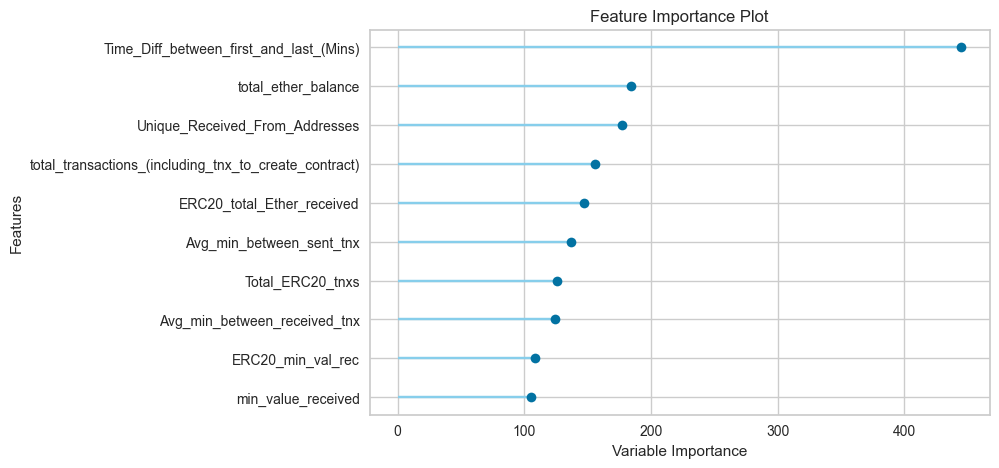

In [7]:
exp.plot_model(best, plot='feature')

# Experience 02 - Categorical features encoded by frequency¶

## Data import

In [8]:
df_train_exp_02 = pd.read_parquet(INTERIM_FOLDER + 'df_train_exp_02.pqt')
df_test_exp_02 = pd.read_parquet(INTERIM_FOLDER + 'df_test_exp_02.pqt')

display(df_test_exp_02.head(3))

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
2493,0x3f023af0a857d0a1591d887194e045301ea2d585,0,17491.39000,30810.71000,259001.92000,6,5,0,5,2,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.89009,0.51434
33,0x046e3a705d9bcd0e53d2b45161b48e39f4bc4090,1,140.50000,0.00000,281.00000,2,1,0,1,2,...,13.37000,13.37000,13.37000,0.00000,0.00000,0.00000,0.00000,1.00000,0.89009,0.16700
3683,0x350d038b70e4acea961427347c6bed44ad8a3d50,0,0.00000,2031.71000,201139.00000,0,99,1,7,0,...,0.74222,1.31803,1.03012,0.00000,0.00000,0.00000,0.00000,2.00000,0.89009,0.31866


## Testing with pycaret

In [9]:
exp = ClassificationExperiment()
exp.setup(
    df_train_exp_02.drop(columns=['Address']),
    target='FLAG', train_size=train_size, session_id=RANDOM_STATE
);

,Description,Value
0,Session id,42
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(3976, 37)"
4,Transformed data shape,"(3976, 37)"
5,Transformed train set shape,"(596, 37)"
6,Transformed test set shape,"(3380, 37)"
7,Numeric features,36
8,Rows with missing values,17.9%
9,Preprocess,True


In [10]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9698,0.9961,0.9710,0.9664,0.9678,0.9394,0.9408,1.2840
gbc,Gradient Boosting Classifier,0.9664,0.9946,0.9676,0.9622,0.9644,0.9325,0.9334,1.2730
catboost,CatBoost Classifier,0.9580,0.9956,0.9604,0.9524,0.9555,0.9157,0.9173,1.2950
et,Extra Trees Classifier,0.9563,0.9955,0.9390,0.9684,0.9531,0.9122,0.9133,1.3300
rf,Random Forest Classifier,0.9513,0.9939,0.9463,0.9519,0.9484,0.9022,0.9034,1.3090
xgboost,Extreme Gradient Boosting,0.9513,0.9926,0.9460,0.9521,0.9479,0.9022,0.9040,1.3460
ada,Ada Boost Classifier,0.9496,0.9858,0.9567,0.9398,0.9471,0.8990,0.9010,1.2780
dt,Decision Tree Classifier,0.9262,0.9264,0.9317,0.9151,0.9222,0.8521,0.8541,1.2630
knn,K Neighbors Classifier,0.8707,0.9368,0.8636,0.8646,0.8625,0.7404,0.7428,1.2720
qda,Quadratic Discriminant Analysis,0.8106,0.9091,0.9030,0.7524,0.8190,0.6250,0.6392,1.2570


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

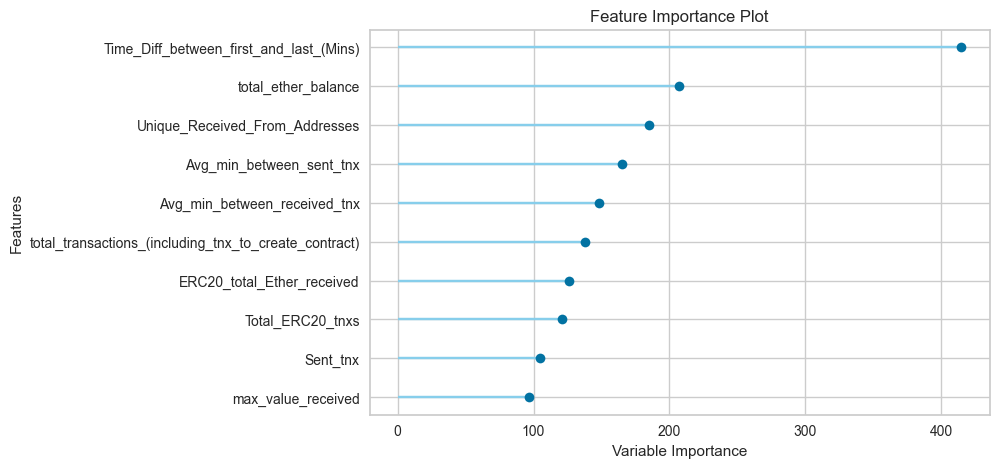

In [11]:
exp.plot_model(best, plot='feature')

## Random Forest Classifier

In [20]:
exp = ClassificationExperiment()
exp.setup(
    df_train_exp_02.drop(columns=['Address']),
    target='FLAG', train_size=train_size, session_id=RANDOM_STATE
)

classifier_rf = exp.create_model('rf')

,Description,Value
0,Session id,42
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(3976, 37)"
4,Transformed data shape,"(3976, 37)"
5,Transformed train set shape,"(596, 37)"
6,Transformed test set shape,"(3380, 37)"
7,Numeric features,36
8,Rows with missing values,17.9%
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.9799,0.9643,0.9000,0.9310,0.8667,0.8686
1,0.9500,0.9939,0.9286,0.9630,0.9455,0.8993,0.8998
2,0.9167,0.9905,0.9286,0.8966,0.9123,0.8330,0.8334
3,0.9833,0.9989,0.9643,1.0000,0.9818,0.9664,0.9670
4,0.9667,1.0000,0.9286,1.0000,0.9630,0.9327,0.9349
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8814,0.9827,0.8571,0.8889,0.8727,0.7617,0.7621
7,0.9831,1.0000,0.9643,1.0000,0.9818,0.9660,0.9665
8,0.9153,0.9942,0.9643,0.8710,0.9153,0.8309,0.8353


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_classifier_rf = exp.tune_model(classifier_rf, n_iter=100, fold=5, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.9897,0.9643,0.9310,0.9474,0.8998,0.9003
1,0.9496,0.9918,0.9464,0.9464,0.9464,0.8988,0.8988
2,0.9748,0.9994,0.9464,1.0000,0.9725,0.9493,0.9505
3,0.9496,0.9929,0.9464,0.9464,0.9464,0.8988,0.8988
4,0.9412,0.9960,0.9455,0.9286,0.9369,0.8818,0.8820
Mean,0.9530,0.9940,0.9498,0.9505,0.9499,0.9057,0.9061
Std,0.0114,0.0034,0.0073,0.0259,0.0119,0.0228,0.0232


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [27]:
classifier_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [26]:
tuned_classifier_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.01,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Light Gradient Boosting Machine

In [22]:
exp = ClassificationExperiment()
exp.setup(
    df_train_exp_02.drop(columns=['Address']),
    target='FLAG', train_size=train_size, session_id=RANDOM_STATE
)

classifier_lgbm = exp.create_model('lightgbm')

,Description,Value
0,Session id,42
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(3976, 37)"
4,Transformed data shape,"(3976, 37)"
5,Transformed train set shape,"(596, 37)"
6,Transformed test set shape,"(3380, 37)"
7,Numeric features,36
8,Rows with missing values,17.9%
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.9844,1.0000,0.9032,0.9492,0.9002,0.9047
1,0.9667,0.9978,0.9643,0.9643,0.9643,0.9330,0.9330
2,0.9500,0.9922,1.0000,0.9032,0.9492,0.9002,0.9047
3,0.9667,0.9967,0.9643,0.9643,0.9643,0.9330,0.9330
4,0.9833,1.0000,0.9643,1.0000,0.9818,0.9664,0.9670
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9322,0.9896,0.9286,0.9286,0.9286,0.8641,0.8641
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
tuned_classifier_lgbm = exp.tune_model(classifier, n_iter=100, fold=5, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.9900,0.9643,0.9310,0.9474,0.8998,0.9003
1,0.9748,0.9938,0.9821,0.9649,0.9735,0.9495,0.9496
2,0.9832,0.9994,0.9643,1.0000,0.9818,0.9662,0.9668
3,0.9412,0.9957,0.9286,0.9455,0.9369,0.8818,0.8820
4,0.9496,0.9957,0.9273,0.9623,0.9444,0.8983,0.8988
Mean,0.9597,0.9949,0.9533,0.9607,0.9568,0.9191,0.9195
Std,0.0162,0.0031,0.0217,0.0231,0.0175,0.0327,0.0327


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
classifier_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [24]:
tuned_classifier_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Experience 03 - Applying PCA before classifier

## Data import

In [93]:
df_train_exp_02 = pd.read_parquet(INTERIM_FOLDER + 'df_train_exp_02.pqt')
df_test_exp_02 = pd.read_parquet(INTERIM_FOLDER + 'df_test_exp_02.pqt')

display(df_test_exp_02.head(3))

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_(including_tnx_to_create_contract),total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
2493,0x3f023af0a857d0a1591d887194e045301ea2d585,0,17491.39000,30810.71000,259001.92000,6,5,0,5,2,0.70950,199.99958,45.16721,0.00371,199.99516,37.63876,11,225.83257,225.83608,0.00351,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.89009,0.51434
33,0x046e3a705d9bcd0e53d2b45161b48e39f4bc4090,1,140.50000,0.00000,281.00000,2,1,0,1,2,5.00000,5.00000,5.00000,2.49694,2.50000,2.49847,3,4.99694,5.00000,0.00306,1.00000,13.37000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,13.37000,13.37000,13.37000,0.00000,0.00000,0.00000,0.00000,1.00000,0.89009,0.16700
3683,0x350d038b70e4acea961427347c6bed44ad8a3d50,0,0.00000,2031.71000,201139.00000,0,99,1,7,0,0.00000,8.99900,0.95540,0.00000,0.00000,0.00000,100,0.00000,94.58509,94.58509,2.00000,2.06025,0.00000,0.00000,0.00000,2.00000,2.00000,0.00000,0.74222,1.31803,1.03012,0.00000,0.00000,0.00000,0.00000,2.00000,0.89009,0.31866


## Preprocessing

In [94]:
scaler = StandardScaler()

train_index = df_train_exp_02.index
test_index = df_test_exp_02.index
y_train_exp_02 = df_train_exp_02.loc[:, ['FLAG']]
y_test_exp_02 = df_test_exp_02.loc[:, ['FLAG']]
X_train_exp_02 = scaler.fit_transform(df_train_exp_02.drop(columns=['Address', 'FLAG']))
X_test_exp_02 = scaler.fit_transform(df_test_exp_02.drop(columns=['Address', 'FLAG']))

X_train_exp_02.fillna(0, inplace=True)
X_test_exp_02.fillna(0, inplace=True)

## PCA

In [95]:
n_components = 17

pca = PCA(n_components=n_components, random_state=RANDOM_STATE, whiten=False)
X_train_exp_02 = pca.fit_transform(X_train_exp_02)
X_test_exp_02 = pca.transform(X_test_exp_02)

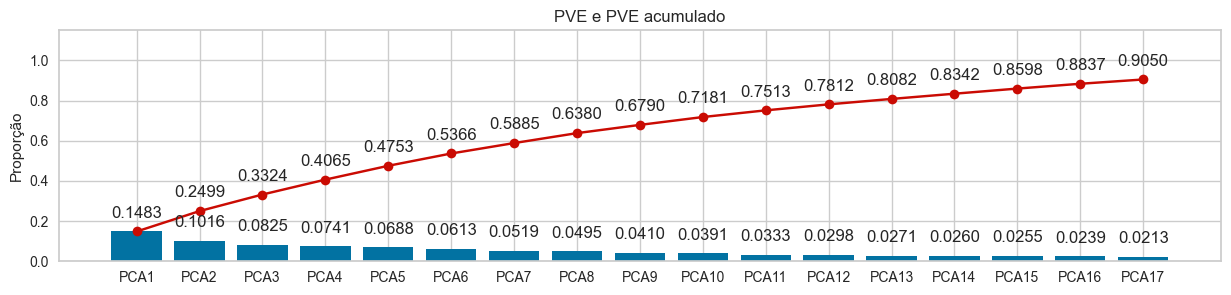

In [98]:
pve = pd.DataFrame(pca.explained_variance_ratio_, columns=["PVE"], index=["PCA"+f'{x}' for x in np.arange(1, n_components+1)])

plt.figure(figsize=(15, 3))
plt.plot(pve.cumsum(), color="r", marker="o")
plt.bar(height=pve.values[:,0], x=np.arange(n_components));

for x,y in zip(np.arange(n_components),pve.values[:,0]):
    label = "{:.4f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x,y in zip(np.arange(1, n_components),pve.cumsum().values[1:,0]):
    label = "{:.4f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title("PVE e PVE acumulado")
plt.ylabel("Proporção")
plt.ylim([0, 1.15]);

In [99]:
df_train_exp_02 = pd.concat([X_train_exp_02, y_train_exp_02], axis=1)
df_train_exp_02.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,FLAG
0,-0.42064,-0.01394,0.16574,-0.19377,0.15779,0.17686,0.39901,-0.17875,0.36847,-0.25738,-0.55516,0.10273,0.60022,0.00981,0.03842,0.04717,0.02189,1
1,-0.52134,-0.03097,0.05360,-0.09776,0.02555,0.04278,0.00607,-0.26262,0.15866,-0.21164,1.36257,-0.24439,-0.92859,-0.04312,-0.20210,-0.15076,0.02463,1
2,-0.52934,-0.03105,0.05719,-0.13070,0.05530,0.07970,0.04721,-0.28994,0.23271,-0.32073,1.27757,-0.19475,-1.06941,-0.04333,-0.19009,-0.16447,0.04514,1
3,2.54116,0.09999,-0.51386,1.94166,-2.39390,-2.04460,-0.09643,0.23090,1.28987,-1.72487,-0.07583,0.89676,0.11734,0.02760,0.04924,0.21295,-0.35407,1
4,-0.44431,-0.01356,0.17757,-0.19577,0.15640,0.18204,0.42435,-0.21460,0.39212,-0.29059,-0.59064,0.12794,0.54239,0.01646,0.04366,0.05112,0.02088,1


## Random forest

In [77]:
exp = ClassificationExperiment()
exp.setup(
    df_train_exp_02,
    target='FLAG', train_size=train_size, session_id=RANDOM_STATE
)

classifier_rf = exp.create_model('rf')

,Description,Value
0,Session id,42
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(3976, 14)"
4,Transformed data shape,"(3976, 14)"
5,Transformed train set shape,"(596, 14)"
6,Transformed test set shape,"(3380, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.9833,0.9286,0.9286,0.9286,0.8661,0.8661
1,0.9167,0.9933,0.9286,0.8966,0.9123,0.8330,0.8334
2,0.9333,0.9922,0.9643,0.9000,0.9310,0.8667,0.8686
3,0.9333,0.9877,0.9643,0.9000,0.9310,0.8667,0.8686
4,0.9333,0.9866,0.9286,0.9286,0.9286,0.8661,0.8661
5,0.9333,0.9978,0.8571,1.0000,0.9231,0.8649,0.8729
6,0.8814,0.9735,0.8571,0.8889,0.8727,0.7617,0.7621
7,0.9153,0.9931,0.8571,0.9600,0.9057,0.8292,0.8336
8,0.9831,0.9988,1.0000,0.9655,0.9825,0.9661,0.9666


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
tuned_classifier_rf = exp.tune_model(classifier_rf, n_iter=100, fold=5, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9250,0.9877,0.9286,0.9123,0.9204,0.8495,0.8496
1,0.9244,0.9918,0.9464,0.8983,0.9217,0.8487,0.8497
2,0.9244,0.9904,0.8929,0.9434,0.9174,0.8478,0.8489
3,0.9328,0.9861,0.8929,0.9615,0.9259,0.8645,0.8665
4,0.9580,0.9923,0.9273,0.9808,0.9533,0.9152,0.9163
Mean,0.9329,0.9897,0.9176,0.9393,0.9277,0.8651,0.8662
Std,0.0129,0.0024,0.0213,0.0305,0.0131,0.0258,0.0259


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## LightGBM

In [79]:
exp = ClassificationExperiment()
exp.setup(
    df_train_exp_02,
    target='FLAG', train_size=train_size, session_id=RANDOM_STATE
)

classifier_lgbm = exp.create_model('lightgbm')

,Description,Value
0,Session id,42
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(3976, 14)"
4,Transformed data shape,"(3976, 14)"
5,Transformed train set shape,"(596, 14)"
6,Transformed test set shape,"(3380, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9754,0.9286,0.8966,0.9123,0.8330,0.8334
1,0.9167,0.9866,0.9286,0.8966,0.9123,0.8330,0.8334
2,0.9333,0.9844,0.9643,0.9000,0.9310,0.8667,0.8686
3,0.9167,0.9844,0.8929,0.9259,0.9091,0.8322,0.8327
4,0.9167,0.9922,0.9286,0.8966,0.9123,0.8330,0.8334
5,0.9833,0.9989,0.9643,1.0000,0.9818,0.9664,0.9670
6,0.8983,0.9896,0.8929,0.8929,0.8929,0.7961,0.7961
7,0.9661,0.9954,0.9286,1.0000,0.9630,0.9318,0.9340
8,0.9831,0.9977,0.9643,1.0000,0.9818,0.9660,0.9665


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
tuned_classifier_lgbm = exp.tune_model(classifier, n_iter=100, fold=5, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9250,0.9771,0.9286,0.9123,0.9204,0.8495,0.8496
1,0.9244,0.9912,0.9286,0.9123,0.9204,0.8484,0.8485
2,0.9496,0.9921,0.9286,0.9630,0.9455,0.8986,0.8991
3,0.9412,0.9932,0.9286,0.9455,0.9369,0.8818,0.8820
4,0.9664,0.9955,0.9636,0.9636,0.9636,0.9324,0.9324
Mean,0.9413,0.9898,0.9356,0.9393,0.9373,0.8821,0.8823
Std,0.0158,0.0065,0.0140,0.0230,0.0163,0.0316,0.0316


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
